In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import svm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns

C:\Users\Kavitha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
loan_data=pd.read_csv("C:\\Users\\Kavitha\\Desktop\\Lending_club\\Lending_Club_Loan_2007_2011.csv",skiprows=1, low_memory=False)
try:
    print("The loan dataset has {} samples with {} features.".format(*loan_data.shape))
except:
    print("The loan dataset could not be loaded. Is the dataset missing?")


The loan dataset has 42542 samples with 147 features.


As we can see, the number of columns will be something to work on. We will remove the desc and url columns mostly because it leads to or describes information that is not necessary for our analysis.

In [3]:
loan_data = loan_data.drop(['desc', 'url'],axis=1)

Another notable thing to remove is to remove columns with more than 50% missing values. It would be time consumming and inefficient to deal with the tremendous amount of missing values from these columns.

In [4]:
# count half point of the dataset.
half_count=len(loan_data)/2
# Drop any column with more than 50% missing values
loan_data=loan_data.dropna(thresh=half_count,axis=1)
# we save the new file
loan_data.to_csv('loan_data.csv',index=False)


We reload the data in the notebook and take a look at the first row.

In [5]:
loan_data=pd.read_csv('loan_data.csv',low_memory=False)
loan_data.drop_duplicates()
loan_data.iloc[0]

id                                1077501
member_id                         1.3e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                            Dec-11
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

In [6]:
loan_data.shape[1]

56

# I. Analysis

## Features Meaning and Usefulness


We will use the first entry of the loan_data.csv file to explore the meaning of the remaining 56 columns.

In [7]:
first_entry=loan_data.iloc[0]
first_entry.to_csv('first_entry.csv',index=True)

In [8]:
description=pd.read_csv('C:\\Users\\Kavitha\\Desktop\\Lending_club\\LCDataDictionary.csv')
description.shape

(117, 2)

In [9]:
import csv

list_first_entry=open('first_entry.csv','r')
first_csvreader=csv.reader(list_first_entry)
first_list=list(first_csvreader)
#print("First list is:",first_list)

list_data_dictio=open('LCDataDictionary.csv','r')
second_csvreader=csv.reader(list_data_dictio)
second_list=list(second_csvreader)
#print("Second list is:",second_list)

table=[]
for row in first_list:
    table.append(row[0])
    
new_table=[]
for col in second_list:
    if col[0] in table:
        new_table.append(col)

In [10]:
df_table=pd.DataFrame(new_table,columns=['Variable','Description'])

In [11]:
df_table=df_table.set_index(['Variable','Description'])

In [12]:
df_table

,
Variable,Description
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
chargeoff_within_12_mths,Number of charge-offs within 12 months
collection_recovery_fee,post charge off collection fee
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.


# First Set Of Features¶

By analyzing the first 13 features, we understand that we can remove the id because it does not tell us anything about the person, these are arbitrary features given by Lending Club.

The funded_amnt and funded_amnt_inv are both features about the future the loan has been approved at that point and cannot be considered in our model. grade and sub_grade are recurring data that we already have with (or a different angle on) the int_rate feature, thus we can dispose of them.

Finally, although it could be an area of improvement in our model, the emp_title feature would be a hard feature to evaluate. Some form of sentiment analysis would need to be used and certain metrics would need to provide a good estimate of a title's meaning and value in the lending context. We will refrain ourselves in delving deeper, but we noticed this could be an interesting data science side project.

In [13]:
first_13 = ['id','member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d']
df_table.loc[first_13]

,
Variable,Description
emp_title,The job title supplied by the Borrower when applying for the loan.*
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
grade,LC assigned loan grade
id,A unique LC assigned ID for the loan listing.
issue_d,The month which the loan was funded
member_id,A unique LC assigned Id for the borrower member.
sub_grade,LC assigned loan subgrade


In [14]:
#We drop the columns enumerated in the cell above.
loan_data=loan_data.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'grade', 'sub_grade', 'emp_title'], axis =1)
loan_data.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


# Second Set Of Features

The next 13 features contain issue_d, this is data about the month the loan was funded, this means it leaks a future information, we need to remove it.
Now, the reason for zip_code inclusion in the prediction features: I'm borrowing an idea from the Stanford project report - they reported using the 
zip_code to join this census data "Median House- hold Income and Mean Household Income [2006-2010]". Here's a direct quote from the report explaining 
the use of census data: "... research like "The sensitivity of the loss given default rate to systematic risk" [4] has shown the link- age between 
default rate and macroeconomic factors, so we have decided to add in census data, with info like regional median income, to train our models on a 
more holistic set of features."

I will not join the census data to our loans data, instead will use just the zip_code to achieve the same results.

Also, I will start off with just the columns we used on Dataquest, which exclude 'last_fico_range_high' I mentioned earlier 
and the 'zip_code'. And, later include these fields.

In [15]:
second_13 = ['annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose',
             'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line', 'inq_last_6mths']

df_table.loc[second_13]


,
Variable,Description
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
dti,"A ratio calculated using the borrowerâ€™s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowerâ€™s self-reported monthly income."
earliest_cr_line,The month the borrower's earliest reported credit line was opened
inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
issue_d,The month which the loan was funded
loan_status,Current status of the loan
purpose,A category provided by the borrower for the loan request.


In [16]:
loan_data = loan_data.drop(['issue_d'], axis =1)

# Third Set Of Features

The following 5 variables are all about the future, they inform us about how the repayment is going, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp. We need to remove them from our model. The total_rec_int is about the interest received to date (meaning the loan has been approved) and total_rec_late_fee is about the interest that are late. These 2 variables need to be removed from the dataset.

In [17]:
third_13 = ['open_acc', 'pub_rec', 'revol_bal','revol_util','total_acc', 'initial_list_status','out_prncp',
           'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee']
df_table.loc[third_13]
# Let's see number of columns we now have:

loan_data.shape[1]

48

In [18]:
loan_data = loan_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)

# Fourth Set Of Features

Finally, the last set of 13 features contain recoveries and collection_recovery_fee which are both leak from the future about the loan. And last_pymnt_d and last_pmyny_amnt are about the end of repayment, which means we cannot know that in advance.

In [19]:
fourth_13 = ['recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d',
            'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
           'delinq_amnt','pub_rec_bankruptcies','tax_liens']
df_table.loc[fourth_13]

,
Variable,Description
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
chargeoff_within_12_mths,Number of charge-offs within 12 months
collection_recovery_fee,post charge off collection fee
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
last_credit_pull_d,The most recent month LC pulled credit for this loan
last_pymnt_amnt,Last total payment amount received
last_pymnt_d,Last month payment was received


In [20]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [21]:
loan_data.shape

(42542, 37)

# Target Column

I will use the 'loan_status' field since it is the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower.
The target column is a critical part when fitting this type of data to machine learning algorithms because it tries to make prediction based on the outcome that we want. In this particular case, we want to predict the loan status (loan_status) which can take many values in total.

Let's explore the different values in 'loan_status' column:

In [22]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

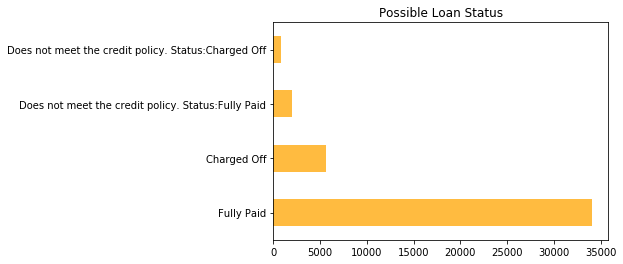

In [23]:
loan_data['loan_status'].value_counts().plot(kind='barh',color='orange',title='Possible Loan Status',alpha=0.75)
plt.show()

We have 4 possibility for loan_status and only 2 values are important in our model's binary classification; fully paid and charged off. These 2 values indicate the result of the loan outcome. We will remove the other possibilities and avoid "translating" those values into the binary possibility (fully paid or charged off).

In [24]:
loan_data=loan_data[(loan_data['loan_status']=="Fully Paid") | (loan_data['loan_status'] == "Charged Off")]

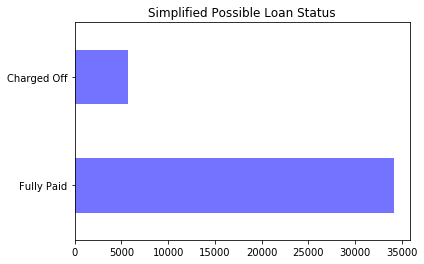

In [25]:
loan_data['loan_status'].value_counts().plot(kind='barh',color='blue',title='Simplified Possible Loan Status',alpha=0.55)
plt.show()

We need to change the object value to numerical for the algorithm processing. Let's use a dictionary.

# CLASSIFICATION

The goal here is to build a machine learning model that will predict who will pay off loan on time and who wil not. This will help avoid investing on risky borrower.

In [26]:
status_replace={
    "loan_status":{
        "Fully Paid":1,
        "Charged Off":0,
    }
}

loan_data=loan_data.replace(status_replace)

In [27]:
loan_data['loan_status'].value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

In [28]:
loan_data.shape

(39786, 37)

# Final Data Cleaning

Single value columns are not information that help our model, it does not provide any insight into the likelihood of default or repayment, and will be removed from the dataset.

In [29]:
orig_columns=loan_data.columns
drop_columns=[]
for col in orig_columns:
    col_series=loan_data[col].dropna().unique()
    if len(col_series)==1:
        drop_columns.append(col)
loan_data=loan_data.drop(drop_columns,axis=1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'hardship_flag',
 'disbursement_method']

In [30]:
loan_data.shape

(39786, 26)

In [31]:
for col in loan_data.columns:
    if (len(loan_data[col].unique()) < 4):
        print(loan_data[col].value_counts())
        print()

 36 months    29096
 60 months    10690
Name: term, dtype: int64

Not Verified       16926
Verified           12844
Source Verified    10016
Name: verification_status, dtype: int64

1    34116
0     5670
Name: loan_status, dtype: int64

N    39636
Y      150
Name: debt_settlement_flag, dtype: int64



Notice that the pymnt_plan field has two unique values but the one value(y) has only 1 frequency and so it is safe to consider as a single value column.

We were able to remove 11 columns and we are left with 23 features to work with.

# III. Methodology

# Preparing The Features: Dealing With Missing Values

We start with the filtered loan_data.csv from the previous analysis. Do we have many Null values in the file loan_data? We will look at how we can handle these values. We need to deal with non-numeric value and null values, because scikit-learn assume that the values are numeric and filled, otherwise it could throw an error or miss evaluate the data.

In [32]:
null_counts=loan_data.isnull().sum()
null_counts

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1078
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_fico_range_high       0
last_credit_pull_d         2
pub_rec_bankruptcies     697
debt_settlement_flag       0
dtype: int64

We have 5 columns with missing values: 2 with last_credit_pull_d, 11 with title, 50 with revol_util,emp_length with 1078 and 697 with pub_rec_bankruptcies . Instead of removing the columns as we did earlier, we will remove the rows. We consider rows as incomplete (in a real life setting, we would reject the application simply because it is not complete).

In [33]:
loan_data=loan_data.drop("pub_rec_bankruptcies",axis=1)
loan_data=loan_data.dropna(axis=0)

In [34]:
loan_data.shape

(38649, 25)

# Handling Non-Numeric Data Types

The data types of columns are important to look at and we will need to deal with non-numeric values in order to encode and use them in our machine learning algorithms.

In [35]:
print(loan_data.dtypes.value_counts())

object     13
float64    11
int64       1
dtype: int64


We have 12 objects that need to be addressed, let's explore them.

In [36]:
object_columns_df=loan_data.select_dtypes(include=["object"])

In [37]:
print(object_columns_df.iloc[0])
loan_data.head(2)

term                      36 months
int_rate                     10.65%
emp_length                10+ years
home_ownership                 RENT
verification_status        Verified
purpose                 credit_card
title                      Computer
zip_code                      860xx
addr_state                       AZ
earliest_cr_line             Jan-85
revol_util                   83.70%
last_credit_pull_d           May-18
debt_settlement_flag              N
Name: 0, dtype: object


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_credit_pull_d,debt_settlement_flag
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,credit_card,...,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,744.0,May-18,N
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,car,...,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,499.0,Oct-16,N


# Categorical Columns

Some of the data seems categorical, this means that we might be able to change it into numerical. Let's count the number of occurences of each column.

term is either 36 or 60.

emp_length is the "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years."

home_ownership can only be 1 of 4 categorical data.

verification_status "Indicates if income was verified by (Lending Club), not verified, or if the income source was verified". One of 2 choices.

addr_state: "The state provided by the borrower in the loan application"

In [38]:
columns=['term','emp_length','home_ownership','verification_status','addr_state','debt_settlement_flag']
for col in columns:
    print(loan_data[col].value_counts())
    print(" ")

 36 months    28234
 60 months    10415
Name: term, dtype: int64
 
10+ years    8897
< 1 year     4576
2 years      4389
3 years      4094
4 years      3435
5 years      3279
1 year       3240
6 years      2227
7 years      1771
8 years      1483
9 years      1258
Name: emp_length, dtype: int64
 
RENT        18471
MORTGAGE    17242
OWN          2837
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
 
Not Verified       16468
Verified           12377
Source Verified     9804
Name: verification_status, dtype: int64
 
CA    6907
NY    3711
FL    2779
TX    2674
NJ    1825
IL    1487
PA    1481
VA    1378
GA    1358
MA    1313
OH    1190
MD    1034
AZ     832
WA     807
CO     769
NC     761
CT     734
MI     688
MO     661
MN     591
NV     482
SC     464
WI     445
OR     436
AL     433
LA     426
KY     323
OK     293
KS     260
UT     253
AR     235
DC     212
RI     197
NM     184
HI     169
WV     168
NH     162
DE     110
WY      79
MT      79
AK      79
SD     

The previous four columns contain a couple categorical values, we will encode them as dummy variables for our model. We will remove the addr_state because if we were to encode all these variables, we would make our dataframe quite large and would slow the computation done by our machine learning algorithm.

Let's now take a look at the next columns:

purpose is "a category provided by the borrower for the loan request".

title : "The loan title provided by the borrower"

In [39]:
print(loan_data["purpose"].value_counts())
print(" ")
print(loan_data["title"].value_counts())

debt_consolidation    18262
credit_card            5004
other                  3824
home_improvement       2884
major_purchase         2109
small_business         1783
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: purpose, dtype: int64
 
Debt Consolidation                          2149
Debt Consolidation Loan                     1695
Personal Loan                                643
Consolidation                                510
debt consolidation                           489
Credit Card Consolidation                    349
Home Improvement                             347
Debt consolidation                           324
Small Business Loan                          317
Credit Card Loan                             308
Personal                                     297
Consolidation Loan                     

The 2 columns seem to have similar information. We will keep the purpose column as the title column is probably added by the customer and can vary. The purpose is streamlined in comparison with the title containing a lot of the same just under a different form (debt consolidation written in different ways).

The next values are dates.

earliest_cr_line: "The month the borrower's earliest reported credit line was opened"

last_credit_pull_d: "The most recent month LC pulled credit for this loan"

These values are a already numerical, but mean something else.

int_rate is the percentage of the interest, that way we know that it is x%.

revol_util: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

The reason the loan was asked for.

We need to encode categorical value with dummy variables.

In [40]:
mapping_dict={
    "emp_length":{
         "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
#dropping one more column debt_settlement_flag
loan_data=loan_data.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"],axis=1)
loan_data["int_rate"]=loan_data["int_rate"].str.rstrip("%").astype("float")
loan_data["revol_util"]=loan_data["revol_util"].str.rstrip("%").astype("float")
loan_data=loan_data.replace(mapping_dict)

Now, let's encode the previous variables

In [41]:
categorical_columns = ["home_ownership", "verification_status", "purpose", "term","debt_settlement_flag"]
dummy_df=pd.get_dummies(loan_data[categorical_columns])
loan_data=pd.concat([loan_data,dummy_df],axis=1)
loan_data=loan_data.drop(categorical_columns,axis=1)

In [42]:
loan_data.head(2)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,debt_settlement_flag_N,debt_settlement_flag_Y
0,5000.0,10.65,162.87,10,24000.0,1,860xx,27.65,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0
1,2500.0,15.27,59.83,0,30000.0,0,309xx,1.00,0.0,5.0,...,0,0,0,0,0,0,0,1,1,0


In [43]:
loan_data['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [44]:
loan_data['zip_code'] = loan_data['zip_code'].str.rstrip('x')
loan_data['zip_code'].head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

In [45]:
loan_data.to_csv('loans_2007.csv', index=False)

In [46]:
filtered_loans = pd.read_csv('loans_2007.csv',low_memory=False)
filtered_loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,debt_settlement_flag_N,debt_settlement_flag_Y
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,5.0,...,0,0,0,0,0,0,0,1,1,0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,2.0,...,0,0,0,1,0,0,1,0,1,0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0
4,3000.0,12.69,67.79,1,80000.0,1,972,17.94,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0


In [47]:
def zip_formatted(row):
    if len(str(row)) == 1:
        row = str(row)+ '00'
    elif len(str(row)) == 2:
        row = str(row)+ '0'
    return int(row)

In [48]:
filtered_loans['zip_code'] = filtered_loans['zip_code'].apply(zip_formatted)

In [49]:
filtered_loans['zip_code'].unique()

array([860, 309, 606, 917, 972, 852, 280, 900, 958, 774, 853, 913, 245,
       951, 641, 921, 670, 890, 770, 335, 799, 605, 103, 150, 326, 564,
       141, 800, 330, 974, 934, 405, 946, 445, 850, 604, 292, 880, 180,
       290, 700, 100, 441, 104, 610, 616, 947, 914, 765, 980, 170, 752,
       787, 540, 225, 440, 437, 559, 912, 325, 300, 923, 352, 130, 146,
       740, 786, 937, 331, 115, 191, 114, 908, 902, 992, 750, 950, 329,
       226, 614, 802, 672, 830, 926, 931, 712, 600, 707, 342, 895, 430,
       919, 996, 891, 935, 801, 928, 233, 927, 970, 211, 303, 194, 263,
       403, 301, 553, 993, 312, 432, 602, 216, 151, 971, 305, 334, 500,
       129, 925, 483, 760, 200, 981, 601, 117, 630, 920, 543, 775, 570,
       380, 221, 985, 113, 275, 236, 148, 450, 532, 729, 321, 959, 941,
       955, 217, 660, 620, 193, 761, 857, 306, 271, 142, 956, 983, 945,
       109, 112, 187, 435, 488, 287, 705, 592, 318, 549, 212, 347, 274,
       265, 785, 270, 813, 690, 260, 201, 349, 322, 124, 940, 96

In [50]:
filtered_loans.isnull().sum()

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
zip_code                               0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_fico_range_high                   0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_car     

In [51]:
filtered_loans = filtered_loans.dropna()
print(filtered_loans.dtypes.value_counts())
print()
filtered_loans.isnull().sum()

int64      29
float64    13
dtype: int64



loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
zip_code                               0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_fico_range_high                   0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_car     

# Model Evaluation And Validation

## Machine Learning Algorithm Fitting

In this part, now that we have cleaned the dataset and encoded the variable with dummy encoding to process categorical data, let's dive in the first machine learning algorithm that we will try to use on the data set. But before, let's see the result of our work on the dataset

In [52]:
filtered_loans = filtered_loans.dropna()
print(filtered_loans.dtypes.value_counts())
print()
filtered_loans.isnull().sum()

int64      29
float64    13
dtype: int64



loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
zip_code                               0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_fico_range_high                   0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_car     

In [53]:
filtered_loans.to_csv('filtered_loans.csv',index=False)

In [54]:
loans = pd.read_csv('filtered_loans.csv',low_memory=False)
loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,debt_settlement_flag_N,debt_settlement_flag_Y
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,5.0,...,0,0,0,0,0,0,0,1,1,0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,2.0,...,0,0,0,1,0,0,1,0,1,0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0
4,3000.0,12.69,67.79,1,80000.0,1,972,17.94,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0


In [55]:
loans['zip_code'].unique()

array([860, 309, 606, 917, 972, 852, 280, 900, 958, 774, 853, 913, 245,
       951, 641, 921, 670, 890, 770, 335, 799, 605, 103, 150, 326, 564,
       141, 800, 330, 974, 934, 405, 946, 445, 850, 604, 292, 880, 180,
       290, 700, 100, 441, 104, 610, 616, 947, 914, 765, 980, 170, 752,
       787, 540, 225, 440, 437, 559, 912, 325, 300, 923, 352, 130, 146,
       740, 786, 937, 331, 115, 191, 114, 908, 902, 992, 750, 950, 329,
       226, 614, 802, 672, 830, 926, 931, 712, 600, 707, 342, 895, 430,
       919, 996, 891, 935, 801, 928, 233, 927, 970, 211, 303, 194, 263,
       403, 301, 553, 993, 312, 432, 602, 216, 151, 971, 305, 334, 500,
       129, 925, 483, 760, 200, 981, 601, 117, 630, 920, 543, 775, 570,
       380, 221, 985, 113, 275, 236, 148, 450, 532, 729, 321, 959, 941,
       955, 217, 660, 620, 193, 761, 857, 306, 271, 142, 956, 983, 945,
       109, 112, 187, 435, 488, 287, 705, 592, 318, 549, 212, 347, 274,
       265, 785, 270, 813, 690, 260, 201, 349, 322, 124, 940, 96

In [56]:
loans['loan_status'].value_counts() / loans.shape[0]

1    0.859686
0    0.140314
Name: loan_status, dtype: float64

In [57]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38649 entries, 0 to 38648
Data columns (total 42 columns):
loan_amnt                              38649 non-null float64
int_rate                               38649 non-null float64
installment                            38649 non-null float64
emp_length                             38649 non-null int64
annual_inc                             38649 non-null float64
loan_status                            38649 non-null int64
zip_code                               38649 non-null int64
dti                                    38649 non-null float64
delinq_2yrs                            38649 non-null float64
inq_last_6mths                         38649 non-null float64
open_acc                               38649 non-null float64
pub_rec                                38649 non-null float64
revol_bal                              38649 non-null float64
revol_util                             38649 non-null float64
total_acc                    

In [58]:
cols = list(loans.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('loan_status')) #Remove b from list
loans = loans[cols+['loan_status']]

In [59]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38649 entries, 0 to 38648
Data columns (total 42 columns):
loan_amnt                              38649 non-null float64
int_rate                               38649 non-null float64
installment                            38649 non-null float64
emp_length                             38649 non-null int64
annual_inc                             38649 non-null float64
zip_code                               38649 non-null int64
dti                                    38649 non-null float64
delinq_2yrs                            38649 non-null float64
inq_last_6mths                         38649 non-null float64
open_acc                               38649 non-null float64
pub_rec                                38649 non-null float64
revol_bal                              38649 non-null float64
revol_util                             38649 non-null float64
total_acc                              38649 non-null float64
last_fico_range_high       

In [60]:

sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    
    

import  itertools
from sklearn.metrics import confusion_matrix
from sklearn import metrics
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(loans.iloc[:,:-1], loans.iloc[:,-1], test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
std_scale=scl.fit(X_train)
X_train=std_scale.fit_transform(X_train)
X_test= std_scale.transform(X_test)

#fields=loan_data.columns.values[:-1]
#loan_data = pd.DataFrame(scl.fit_transform(loan_data[fields]), columns = fields)
loans.head(2)


,loan_amnt,int_rate,installment,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,debt_settlement_flag_N,debt_settlement_flag_Y,loan_status
0,5000.0,10.65,162.87,10,24000.0,860,27.65,0.0,1.0,3.0,...,0,0,0,0,0,1,0,1,0,1
1,2500.0,15.27,59.83,0,30000.0,309,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,1,1,0,0


In [63]:
X_test

array([[ 0.52608215,  0.63536865,  0.93788512, ..., -0.60506412,
         0.0631983 , -0.0631983 ],
       [-1.27536069, -1.38111202, -1.29961948, ..., -0.60506412,
         0.0631983 , -0.0631983 ],
       [ 0.35866181, -0.51536965,  0.5958307 , ..., -0.60506412,
         0.0631983 , -0.0631983 ],
       ...,
       [-0.0933731 , -1.11762521,  0.02211279, ..., -0.60506412,
         0.0631983 , -0.0631983 ],
       [-1.27536069, -0.45353091, -1.38046784, ...,  1.65271739,
         0.0631983 , -0.0631983 ],
       [ 3.1713235 ,  1.19191732,  3.59256534, ..., -0.60506412,
         0.0631983 , -0.0631983 ]])

In [64]:
loans.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'zip_code', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_fico_range_high', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'debt_settlement_flag_N', 'debt_settlement_flag_Y',
       'loan_status'],
      dtype='object')

Logistic regression training dataset accuracy is  0.8624793816100133
Logistic regression test dataset accuracy is  0.8659767141009056


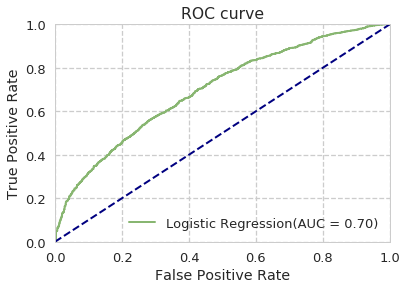

[[  28 1025]
 [  11 6666]]

TN = 28
FN = 1025
FP = 11
TP = 6666


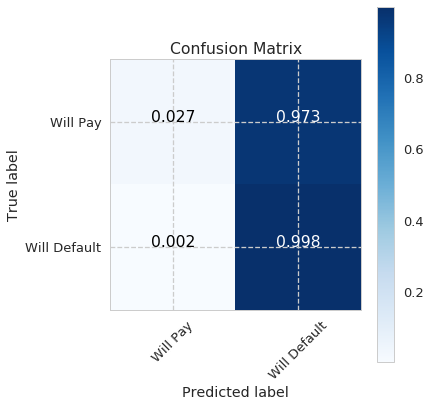

In [65]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)

LR_Predict_train = clf_LR.predict(X_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_test = clf_LR.predict(X_test)
LR_Accuracy_train = accuracy_score(y_train,LR_Predict_train.round())
LR_Accuracy_test = accuracy_score(y_test,LR_Predict_test.round())
print("Logistic regression training dataset accuracy is ",LR_Accuracy_train)
print("Logistic regression test dataset accuracy is ",LR_Accuracy_test)

plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))

confuse = confusion_matrix(y_test,LR_Predict_test)
#confuse =plot_confusion_matrix(LR_Predict_bin, normalize=True)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

plot_confusion_matrix(LR_Predict_test, normalize=True)


In [66]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=loan_data.iloc[:,:-1].values
    y=loan_data.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg =LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.9971797459183938
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Logistic regression training set accuracy is  0.8624793816100133
Logistic regression test set accuracy is  0.8659767141009056


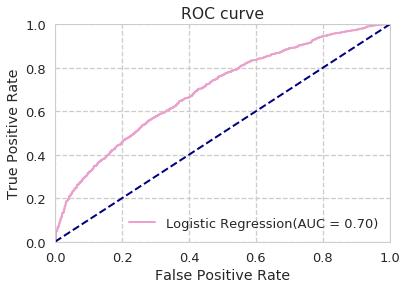

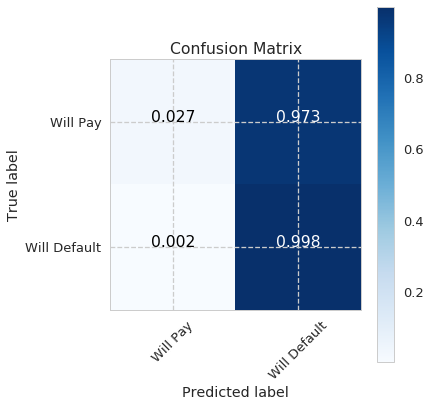

[[  28 1025]
 [  11 6666]]

TN = 28
FN = 1025
FP = 11
TP = 6666


In [67]:
clf_LR = LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_train = clf_LR.predict(X_train)
LR_Accuracy_test = accuracy_score(y_train,LR_Predict_train.round())
print("Logistic regression training set accuracy is ",LR_Accuracy_train)

LR_Predict_test = clf_LR.predict(X_test)
LR_Accuracy_test = accuracy_score(y_test,LR_Predict_test.round())
print("Logistic regression test set accuracy is ",LR_Accuracy_test)

plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_test, normalize=True)
plt.show()

confuse = confusion_matrix(y_test,LR_Predict_test)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])


Decision Tree accuracy of training set is  1.0
Decision Tree accuracy of test set is  0.7710219922380336


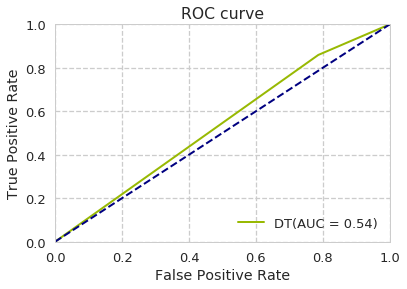

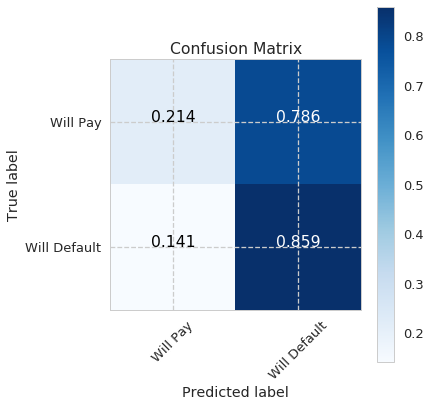

DT              precision    recall  f1-score   support

          0       0.19      0.21      0.20      1053
          1       0.87      0.86      0.87      6677

avg / total       0.78      0.77      0.78      7730



In [68]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train,y_train)
DT_pred_train = clf_DT.predict(X_train)
DT_pred_test = clf_DT.predict(X_test)
DT_predictproba = clf_DT.predict_proba(X_test)[:,1]
DT_Acc_train = accuracy_score(y_train,DT_pred_train)
DT_Acc_test = accuracy_score(y_test,DT_pred_test)
print("Decision Tree accuracy of training set is ",DT_Acc_train)
print("Decision Tree accuracy of test set is ",DT_Acc_test)
plotAUC(y_test,DT_predictproba,'DT')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(DT_predictproba, normalize=True)
plt.show()
print("DT",classification_report(y_test, DT_pred_test, target_names=None))


In [69]:
from sklearn.grid_search import RandomizedSearchCV
rf = RandomForestClassifier(criterion='entropy', random_state=0)
maxFeatures = range(1,loan_data.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=loan_data.iloc[:,:-1].values
y=loan_data.iloc[:,-1].values
rand.fit(X,y)
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Random Forest training set accuracy is : 0.991882014295417
Random Forest test set accuracy is : 0.8525226390685641


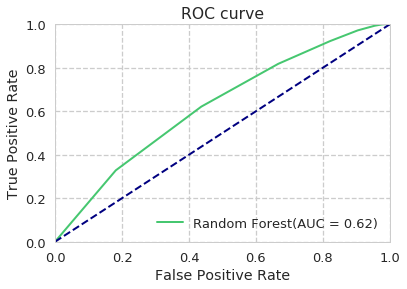

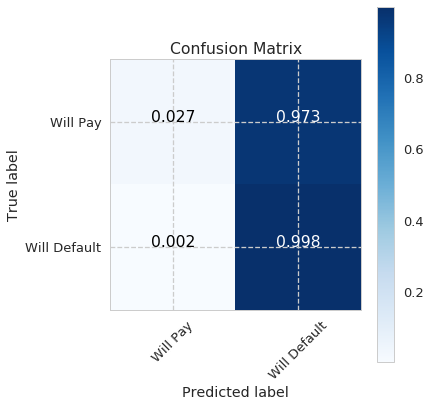

[[ 4130   240]
 [   11 26538]]

TN = 4130
FN = 240
FP = 11
TP = 26538


In [70]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "entropy",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)

rfPredict_train = randomForest.predict(X_train)
rfAccuracy_train = accuracy_score(y_train,rfPredict_train)

rfPredict_test = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy_test = accuracy_score(y_test,rfPredict_test)
roc_score = metrics.roc_auc_score(y_test,rfPredict_test)
print("Random Forest training set accuracy is :", rfAccuracy_train)
print("Random Forest test set accuracy is :", rfAccuracy_test)

plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_test, normalize=True)
plt.show()

confuse = confusion_matrix(y_train,rfPredict_train)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])


# Feature Importance

In [71]:
feature_list=list(loans.columns)
# Get numerical feature importances
importances = list(randomForest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: int_rate             Importance: 0.09
Variable: annual_inc           Importance: 0.08
Variable: zip_code             Importance: 0.08
Variable: dti                  Importance: 0.08
Variable: revol_bal            Importance: 0.08
Variable: revol_util           Importance: 0.08
Variable: installment          Importance: 0.07
Variable: last_fico_range_high Importance: 0.07
Variable: loan_amnt            Importance: 0.06
Variable: total_acc            Importance: 0.06
Variable: open_acc             Importance: 0.05
Variable: emp_length           Importance: 0.04
Variable: inq_last_6mths       Importance: 0.03
Variable: delinq_2yrs          Importance: 0.01
Variable: pub_rec              Importance: 0.01
Variable: home_ownership_MORTGAGE Importance: 0.01
Variable: home_ownership_RENT  Importance: 0.01
Variable: verification_status_Not Verified Importance: 0.01
Variable: verification_status_Source Verified Importance: 0.01
Variable: verification_status_Verified Importance: 0.01
Va

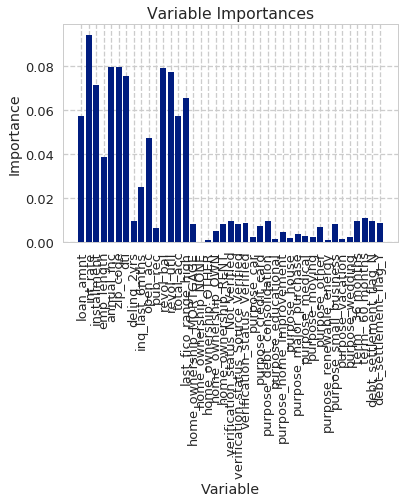

In [72]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Support Vector Machine with Grid Search CV

In [73]:
clf_svm = SVC(probability=True)
clf_svm.fit(X_train,y_train)
clfsvmPredict_train = clf_svm.predict(X_train)
clfsvmPredict_test = clf_svm.predict(X_test)

In [74]:
clfsvmPredictproba = clf_svm.predict_proba(X_test)[:,1] #for ROC curve
clfsvmAccuracy_train = accuracy_score(y_train,clfsvmPredict_train)
print("SVM accuracy of training set is ",clfsvmAccuracy_train)
clfsvmAccuracy_test = accuracy_score(y_test,clfsvmPredict_test)
print("SVM accuracy of test set is ",clfsvmAccuracy_test)
confuse = confusion_matrix(y_train,rfPredict_train)
#confuse =plot_confusion_matrix(LR_Predict_bin, normalize=True)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])


SVM accuracy of training set is  0.8628674924803519
SVM accuracy of test set is  0.8658473479948253
[[ 4130   240]
 [   11 26538]]

TN = 4130
FN = 240
FP = 11
TP = 26538


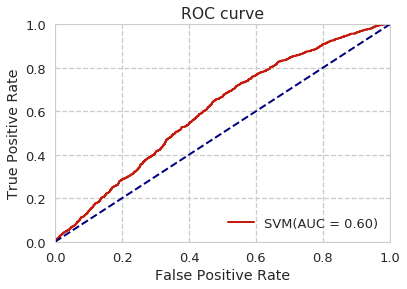

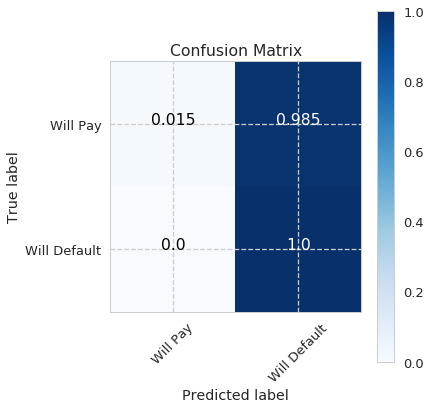

In [75]:
plotAUC(y_test,clfsvmPredictproba, 'SVM')
#plotAUC(y_test,rfPredictproba, 'Random Forest')
#plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.figure(figsize=(6,6))
plot_confusion_matrix(clfsvmPredict_test, normalize=True)
plt.show()

# K Nearest Neighbors(KNN) with Grid Search CV

In [76]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=KNeighborsClassifier()
k_range = list(range(35, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
grid.fit(loan_data.iloc[:,:-1].values, loan_data.iloc[:,-1].values)
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]# create a list of the mean scores only
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)

{'n_neighbors': 35}
---------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')


KNN accuracy of training set is  0.8627704647627672
KNN accuracy of test set is  0.8659767141009056


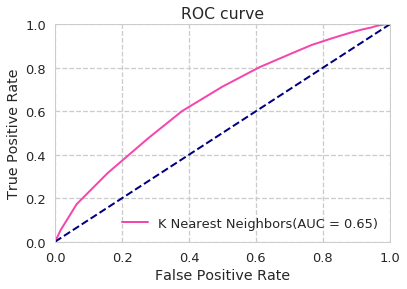

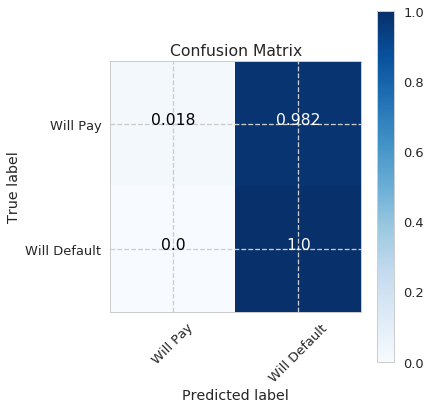

[[ 101  952]
 [ 188 6489]]

TN = 101
FN = 952
FP = 188
TP = 6489


In [77]:
clf_knn_final = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])   #taking the the best from the above cell and using it to find predictions
clf_knn_final.fit(X_train,y_train)
knn_pred_train = clf_knn_final.predict(X_train)
knn_pred_test = clf_knn_final.predict(X_test)
knn_predictproba = clf_knn_final.predict_proba(X_test)[:,1]
KNN_Acc_train = accuracy_score(y_train,knn_pred_train)
print("KNN accuracy of training set is ",KNN_Acc_train)
KNN_Acc_test = accuracy_score(y_test,knn_pred_test)
print("KNN accuracy of test set is ",KNN_Acc_test)
#plotAUC(y_test,rfPredictproba, 'Random Forest')
#plotAUC(y_test,LR_Predict_test,'Logistic Regression')
#plotAUC(y_test,clfsvmPredictproba, 'SVM')
plotAUC(y_test,knn_predictproba,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(knn_pred_test, normalize=True)
plt.show()

confuse = confusion_matrix(y_test,rfPredict_test)
#confuse =plot_confusion_matrix(LR_Predict_bin, normalize=True)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

# Bagging for Classification

Bagging accuracy score is : 0.9964036021630657
Bagging              precision    recall  f1-score   support

          0       0.72      0.03      0.05      1053
          1       0.87      1.00      0.93      6677

avg / total       0.85      0.87      0.81      7730



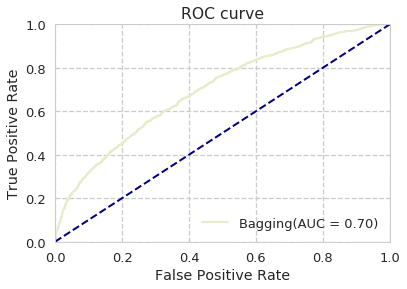

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold

seed=7
kfold=KFold(n_splits=10,random_state=seed)
Bagging_clf = BaggingClassifier(base_estimator=clf_LR,random_state=seed)
results = cross_val_score(Bagging_clf, loan_data.iloc[:,:-1].values, loan_data.iloc[:,-1].values, cv=kfold)
print("Bagging accuracy score is :",results.mean())


Bagging_clf.fit(X_train,y_train)
Bagging_pred=Bagging_clf.predict(X_test)
Bagging_predictproba = Bagging_clf.predict_proba(X_test)[:,1]
plotAUC(y_test,Bagging_predictproba, 'Bagging')

print("Bagging",classification_report(y_test, Bagging_pred, target_names=None))

# Ada Boost Classifier

0.9998965044367486
Ada Boost              precision    recall  f1-score   support

          0       0.38      0.04      0.08      1053
          1       0.87      0.99      0.92      6677

avg / total       0.80      0.86      0.81      7730



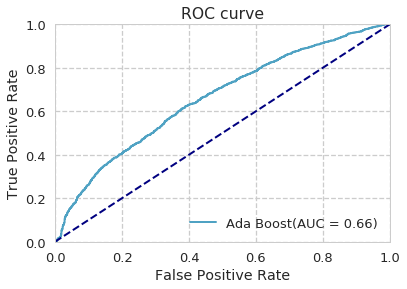

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier(max_depth=4) 
Ada_clf=AdaBoostClassifier(n_estimators=50, base_estimator=et,learning_rate=1)
#Ada_clf=AdaBoostClassifier(n_estimators=100,learning_rate=1)
scores = cross_val_score(Ada_clf, loan_data.iloc[:,:-1].values, loan_data.iloc[:,-1].values)
print("Ada Boost accuracy is ",scores.mean())

Ada_clf.fit(X_train,y_train)
Ada_pred=Ada_clf.predict(X_test)
Ada_predictproba = Ada_clf.predict_proba(X_test)[:,1]
plotAUC(y_test,Ada_predictproba, 'Ada Boost')

print("Ada Boost",classification_report(y_test, Ada_pred, target_names=None))

# Multi-Layer Perceptron Classifier

A multilayer perceptron (MLP) is a feedforward artificial neural network. An MLP consists of at least three layers of nodes. MLP utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable. We got our highest accuracy for MLP classifier

MLP accuracy of training set is : 0.8628674924803519
MLP accuracy of training set is : 0.864941785252264


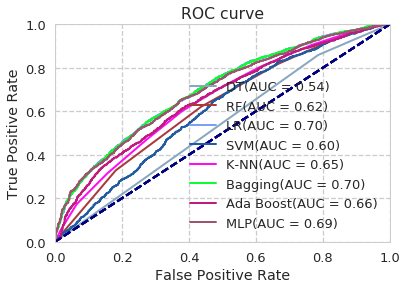

In [81]:
from sklearn.neural_network import MLPClassifier

clf_NN=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_NN.fit(X_train,y_train)
predict_NN_train = clf_NN.predict(X_train)

predict_NN_test = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NN_accuracy_train=accuracy_score(y_train,predict_NN_train)
NN_accuracy_test=accuracy_score(y_test,predict_NN_test)
print("MLP accuracy of training set is :",NN_accuracy_train)
print("MLP accuracy of training set is :",NN_accuracy_test)
plotAUC(y_test,DT_predictproba,'DT')
plotAUC(y_test,rfPredictproba, 'RF')
plotAUC(y_test,LR_Predict,'LR')
plotAUC(y_test,clfsvmPredictproba, 'SVM')
plotAUC(y_test,knn_predictproba,'K-NN')
plotAUC(y_test,Bagging_predictproba, 'Bagging')
plotAUC(y_test,Ada_predictproba, 'Ada Boost')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()
plt.figure(figsize=(20,20))
#plot_confusion_matrix(predictproba_NN, normalize=True)
#plt.show()


# Precision,recall,F1score for all models

In [83]:
from sklearn.metrics import classification_report

print("DT",classification_report(y_test, DT_pred_test, target_names=None))
print("RF",classification_report(y_test, rfPredict_test, target_names=None))
print("SVM",classification_report(y_test, clfsvmPredict_test, target_names=None))
print("LR",classification_report(y_test, LR_Predict_test, target_names=None))
print("KNN",classification_report(y_test, knn_pred_test, target_names=None))
print("MLP",classification_report(y_test, predict_NN_test, target_names=None))
print("Bagging",classification_report(y_test, Bagging_pred, target_names=None))
print("Ada Boost",classification_report(y_test, Ada_pred, target_names=None))

DT              precision    recall  f1-score   support

          0       0.19      0.21      0.20      1053
          1       0.87      0.86      0.87      6677

avg / total       0.78      0.77      0.78      7730

RF              precision    recall  f1-score   support

          0       0.35      0.10      0.15      1053
          1       0.87      0.97      0.92      6677

avg / total       0.80      0.85      0.81      7730

SVM              precision    recall  f1-score   support

          0       1.00      0.02      0.03      1053
          1       0.87      1.00      0.93      6677

avg / total       0.88      0.87      0.81      7730

LR              precision    recall  f1-score   support

          0       0.72      0.03      0.05      1053
          1       0.87      1.00      0.93      6677

avg / total       0.85      0.87      0.81      7730

KNN              precision    recall  f1-score   support

          0       0.90      0.02      0.04      1053
          1     